# <h1 style="font-family: Trebuchet MS; padding: 20px; font-size: 40px; color: #2D2926; text-align: center; line-height: 0.87;background-color: #E94B3C"><b> EmoNet: Advanced Emotion Classification Using NLP Techniques </b><br></h1>

## Problem Statement:

Create an advanced emotion classification model leveraging state-of-the-art Natural Language Processing (NLP) techniques to accurately identify and categorize emotions expressed in textual data. The objective is to develop a model capable of effectively predicting the emotional sentiment associated with each document in a given dataset. This entails training the model on a diverse corpus of documents annotated with corresponding emotion labels and optimizing its performance to achieve high accuracy and robustness in classifying emotions across various contexts. The resulting model should exhibit superior capabilities in understanding and interpreting nuanced emotional nuances, enabling its application in a wide range of real-world scenarios such as sentiment analysis, customer feedback analysis, and mood detection in conversational interfaces.

## Aim:

- Develop a high-performing emotion classification model using NLP techniques to accurately categorize emotions expressed in textual data.

## Dataset Attributes

- Text Data: Each entry contains a piece of text representing a statement or expression of emotion. These textual documents vary in length and content, reflecting the diverse range of emotional experiences.

- Emotion Label: The emotion label indicates the predominant emotion conveyed in the corresponding text data. Emotions such as sorrow, rage, happiness, amaze, care, and scare are represented in the dataset.

## Intermediate Model

# <center><div style="font-family: Trebuchet MS; background-color: #E94B3C; color: #2D2926; padding: 12px; line-height: 1;">Dataset Information</div></center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('train.csv')

In [3]:
data.head()

,Text,Emotion
0,i didnt feel humiliated,sorrow
1,i can go from feeling so hopeless to so damned...,sorrow
2,im grabbing a minute to post i feel greedy wrong,rage
3,i am ever feeling nostalgic about the fireplac...,care
4,i am feeling grouchy,rage


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Text     15000 non-null  object
 1   Emotion  15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB


In [5]:
data.shape

(15000, 2)

In [6]:
data.columns

Index(['Text', 'Emotion'], dtype='object')

In [7]:
data.describe().T

,count,unique,top,freq
Text,15000,14971,i was sitting in the corner stewing in my own ...,2
Emotion,15000,6,happiness,4989


In [8]:
null_values = data.isnull().any().any()

In [9]:
if null_values:
    print("There are null values in the DataFrame.")
else:
    print("There are no null values in the DataFrame.")

There are no null values in the DataFrame.


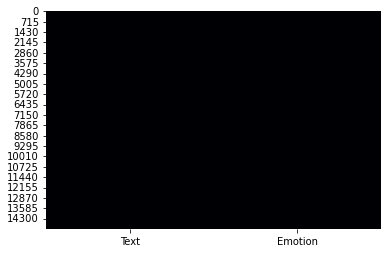

In [10]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

Determining the frequency of each emotion category in the dataset.

In [11]:
data['Emotion'].value_counts()

happiness    4989
sorrow       4412
rage         2028
scare        1804
care         1226
amaze         541
Name: Emotion, dtype: int64

Utilizing visualizations such as bar charts or pie charts to display the distribution of emotions in the dataset.

In [12]:
plt.figure(figsize=(10, 8))
ax = emotion_counts.plot(kind='bar', color=colors)
plt.title('Distribution of Emotions')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=30)

# Add counts on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.show()

NameError: name 'emotion_counts' is not defined

<Figure size 720x576 with 0 Axes>

In [14]:
plt.figure(figsize=(10, 8))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Emotions')
plt.show()

NameError: name 'emotion_counts' is not defined

<Figure size 720x576 with 0 Axes>

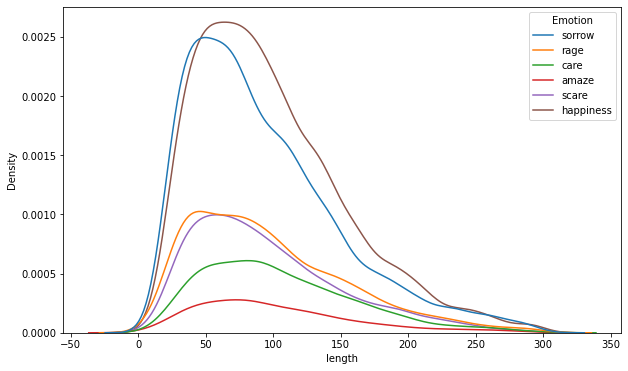

In [15]:
data['length'] = data.Text.apply(lambda x:len(x))
fig = plt.figure(figsize=(10,6))
sns.kdeplot(x=data['length'], hue=data["Emotion"])
plt.show()


In [16]:
# Convert 'Emotion' column to categorical data type
data['Emotion_num'] = pd.Categorical(data['Emotion']).codes

In [17]:
data.head()

,Text,Emotion,length,Emotion_num
0,i didnt feel humiliated,sorrow,23,5
1,i can go from feeling so hopeless to so damned...,sorrow,108,5
2,im grabbing a minute to post i feel greedy wrong,rage,48,3
3,i am ever feeling nostalgic about the fireplac...,care,92,1
4,i am feeling grouchy,rage,20,3


## Data pre-processing & Feature Engineering

Preprocess the text data to remove noise and irrelevant information, such as punctuation, special characters, and stop words.

Perform tokenization to break down the text data into individual words or tokens.

In [18]:
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Define function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters, punctuation, and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'Text' column in the DataFrame
data['Processed_Text'] = data['Text'].apply(preprocess_text)

# Display the preprocessed text data
print(data[['Text', 'Processed_Text']].head())


[nltk_data] Downloading package punkt to /Users/saisrikar/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/saisrikar/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                Text  \
0                            i didnt feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2   im grabbing a minute to post i feel greedy wrong   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                      Processed_Text  
0                              didnt feel humiliated  
1  go feeling hopeless damned hopeful around some...  
2          im grabbing minute post feel greedy wrong  
3  ever feeling nostalgic fireplace know still pr...  
4                                    feeling grouchy  


In [19]:
data.head()

,Text,Emotion,length,Emotion_num,Processed_Text
0,i didnt feel humiliated,sorrow,23,5,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,sorrow,108,5,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,rage,48,3,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,care,92,1,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,rage,20,3,feeling grouchy


create a word cloud to visualize the frequency of words in the text. Describe the process you followed to create the word cloud.

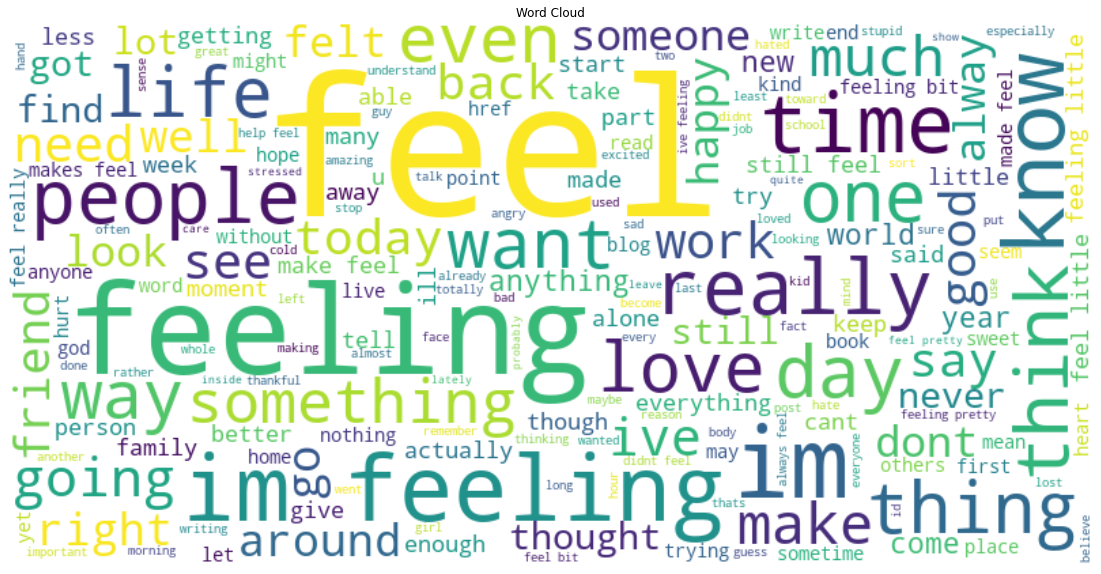

In [20]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all text data into a single string
all_text = ' '.join(data['Processed_Text'])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot word cloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

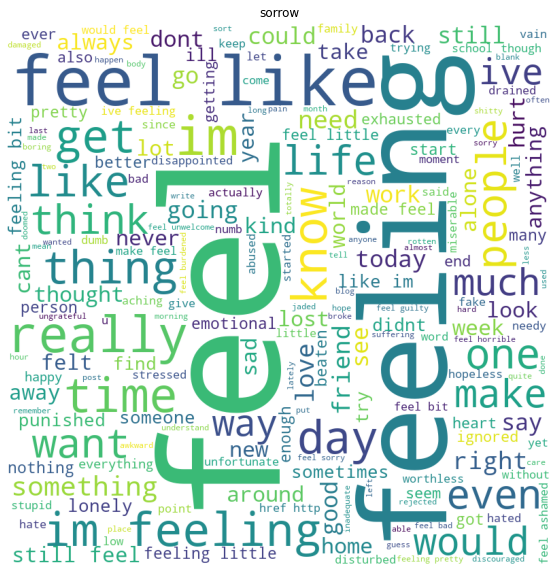

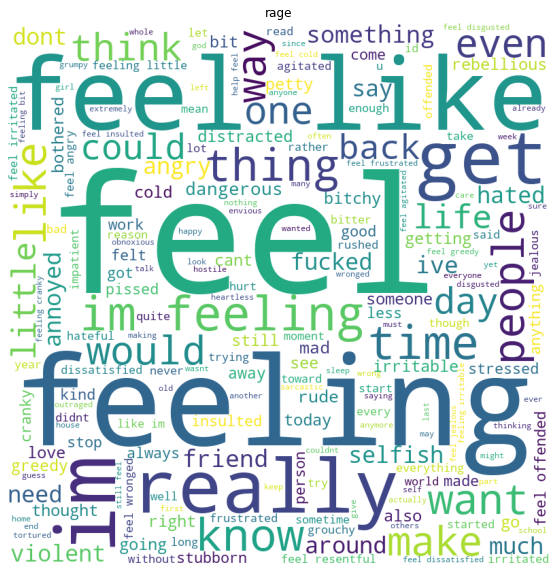

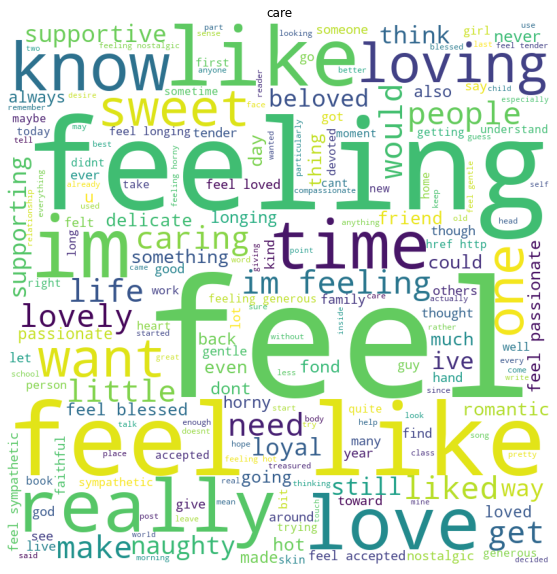

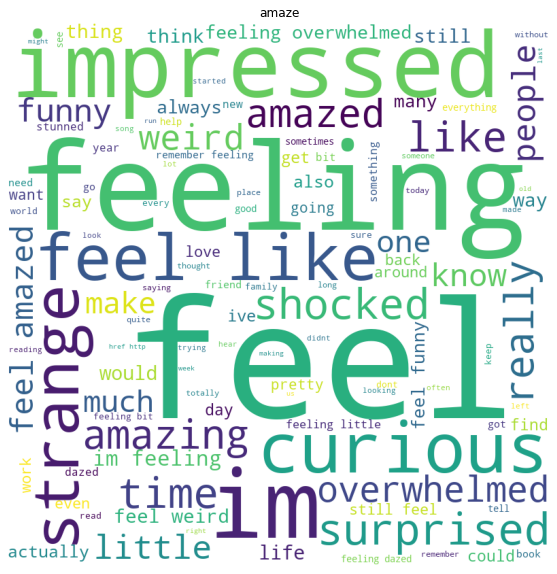

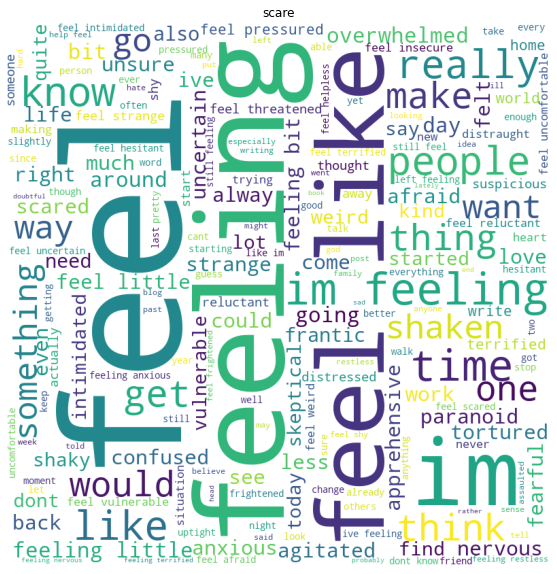

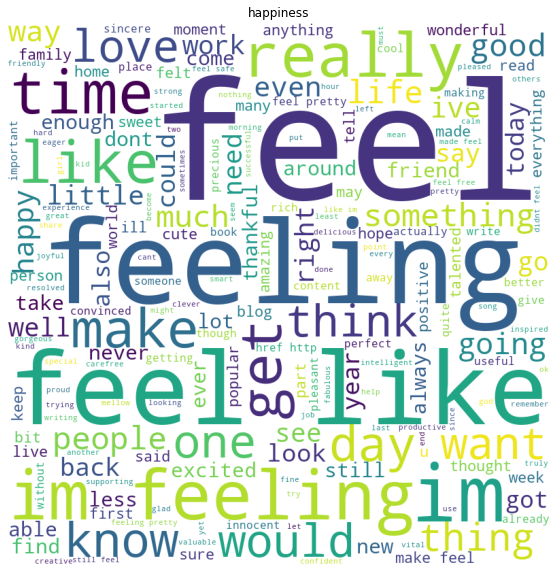

In [21]:
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load stopwords
stopwords_list = stopwords.words('english')

# Get unique emotions
emotions = data['Emotion'].unique()

# Create word cloud for each emotion
for emotion in emotions:
    # Concatenate text for the current emotion
    text = " ".join(data[data['Emotion'] == emotion]['Processed_Text'])
    
    # Generate word cloud
    wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=stopwords_list, min_font_size=10).generate(text)
    
    # Plot word cloud
    plt.figure(figsize=(20, 10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title(emotion)
    plt.show()

Experiment with different text representation techniques, such as frequency vector, TF-IDF (Term Frequency-Inverse Document Frequency)to transform the text data into numerical features that can be used by machine learning models.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Initialize CountVectorizer to create frequency vectors
count_vectorizer = CountVectorizer()

# Fit and transform the processed text data using CountVectorizer
count_vectors = count_vectorizer.fit_transform(data['Processed_Text'])

# Initialize TfidfVectorizer to create TF-IDF features
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the processed text data using TfidfVectorizer
tfidf_vectors = tfidf_vectorizer.fit_transform(data['Processed_Text'])

# Print the shape of the frequency vectors and TF-IDF vectors
print("Shape of frequency vectors:", count_vectors.shape)
print("Shape of TF-IDF vectors:", tfidf_vectors.shape)


Shape of frequency vectors: (15000, 14567)
Shape of TF-IDF vectors: (15000, 14567)


## LDA

In [23]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=8, random_state=42)

# Fit LDA model to TF-IDF vectors
lda_model.fit(tfidf_vectors)

# Define function to print top keywords for each topic
def print_top_keywords(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #{}:".format(topic_idx + 1))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

# Get feature names (words) from TfidfVectorizer
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Print top keywords for each topic
print_top_keywords(lda_model, tfidf_feature_names, 10)



Topic #1:
feel feeling im like really frustrated fine little bit restless

Topic #2:
feel feeling im like little still welcomed cold well shaken

Topic #3:
feel feeling like im know people time really overwhelmed get

Topic #4:
feel feeling like im http sorry get work href would

Topic #5:
feel feeling like im really know tortured would blessed fucked

Topic #6:
feel feeling im like really love ive dont time bit

Topic #7:
feel feeling im like even dumb weird right unhappy amazing

Topic #8:
feel like feeling im really people ive safe time little


In [24]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model with different parameters
num_topics = 8  # Adjust the number of topics
alpha = 0.1  # Adjust the alpha parameter
beta = 0.1  # Adjust the beta parameter
lda_model = LatentDirichletAllocation(n_components=num_topics, 
                                       doc_topic_prior=alpha,
                                       topic_word_prior=beta,
                                       random_state=42)

# Fit LDA model to TF-IDF vectors
lda_model.fit(tfidf_vectors)

# Print top keywords for each topic
print_top_keywords(lda_model, tfidf_feature_names, 10)



Topic #1:
feel feeling im like really little angry still frustrated bit

Topic #2:
feeling feel im like little still exhausted hated well time

Topic #3:
feel feeling like im know overwhelmed time people really get

Topic #4:
feel feeling im like http sorry get work href really

Topic #5:
feel feeling like im really would know tortured want fucked

Topic #6:
feel feeling im like love really dont want stressed ive

Topic #7:
feel feeling im like dumb even weird right unhappy loved

Topic #8:
feel feeling like im ive really little people safe defeated


Topic modeling, exemplified by Latent Dirichlet Allocation (LDA), serves as a pivotal technique for uncovering hidden themes and extracting insights from textual datasets. Through a series of preprocessing steps including text normalization, tokenization, and stop word removal, the text data is transformed into numerical features using TF-IDF vectorization. Following this, the LDA model is trained to identify latent topics within the dataset. These topics are represented by sets of keywords, each indicative of a specific theme or concept present in the text. For instance, topics may encapsulate sentiments like frustration, feelings of being welcomed, or discussions centered around work-related matters. The importance of topic modeling lies in its ability to reveal underlying structures and patterns within the data, facilitating a deeper understanding of the content, aiding in content summarization and organization, and assisting in decision-making processes across various domains. In essence, topic modeling serves as a powerful tool for unlocking the latent insights embedded within textual data, thereby empowering informed decision-making and knowledge discovery endeavors.








## Modelling

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['Processed_Text'], data['Emotion_num'], test_size=0.2, random_state=42)

In [28]:
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

## Random Forest

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize Random Forest classifier
rfc = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(rfc, param_grid, cv=5, n_jobs=-1)

# Perform grid search
grid_search.fit(X_train_tfidf, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Predict on the test set using the best model
best_rfc = grid_search.best_estimator_
rfc_y_pred = best_rfc.predict(X_test_tfidf)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [36]:
print("Classification Report:\n", classification_report(y_test, rfc_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.73      0.72        95
           1       0.86      0.73      0.79       255
           2       0.87      0.95      0.91       999
           3       0.90      0.83      0.86       409
           4       0.87      0.83      0.85       350
           5       0.93      0.93      0.93       892

    accuracy                           0.89      3000
   macro avg       0.86      0.83      0.84      3000
weighted avg       0.89      0.89      0.89      3000



In [45]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rfc, X_train_tfidf, y_train, cv=5)

In [46]:
# Print the score for each fold
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} score: {score}")

# Calculate and print the average cross-validation score
average_cv_score = cv_scores.mean()
print(f"Average CV score: {average_cv_score}")

Fold 1 score: 0.8791666666666667
Fold 2 score: 0.8829166666666667
Fold 3 score: 0.8654166666666666
Fold 4 score: 0.8741666666666666
Fold 5 score: 0.8679166666666667
Average CV score: 0.8739166666666666


In [47]:
# Initialize and train Random Forest classifier
rfc = RandomForestClassifier(random_state=42)
rfc.fit(X_train_tfidf, y_train)

# Get predicted probabilities for each class
rfc_y_pred_proba = rfc.predict_proba(X_test_tfidf)

# Initialize lists to store fpr, tpr, and auc for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

# Calculate fpr, tpr, and auc for each class
for i in range(len(data['Emotion_num'].unique())):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, rfc_y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(data['Emotion_num'].unique())):
    plt.plot(fpr[i], tpr[i], label='ROC curve (AUC = %0.2f) for class %d' % (roc_auc[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Random Forest')
plt.legend(loc="lower right")
plt.show()

NameError: name 'roc_curve' is not defined

In [ ]:
from sklearn.metrics import roc_auc_score

# Initialize an empty list to store AUC scores for each class
auc_scores = []

# Calculate AUC score for each class
for i in range(len(data['Emotion_num'].unique())):
    auc_score = roc_auc_score(y_test == i, rfc_y_pred_proba[:, i])
    auc_scores.append(auc_score)

# Print the AUC scores
print("AUC Scores for Each Class:")
for i, auc_score in enumerate(auc_scores):
    print("Class {}: {:.4f}".format(i, auc_score))
# Calculate the average ROC curve score
avg_auc_score = np.mean(auc_scores)

# Print the average ROC curve score
print("Average ROC Curve Score:", avg_auc_score)

In [ ]:
from sklearn.metrics import plot_confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plot_confusion_matrix(rfc, X_test_tfidf, y_test, cmap='coolwarm', display_labels=data['Emotion'].unique())
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

## SVM


In [191]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
# Define the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Initialize SVM classifier
svm = SVC(random_state=42)

# Initialize GridSearchCV for SVM
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, n_jobs=-1)

# Perform grid search for SVM
grid_search_svm.fit(X_train_tfidf, y_train)

# Get the best parameters for SVM
best_params_svm = grid_search_svm.best_params_
print("Best Parameters for SVM:", best_params_svm)

# Predict on the test set using the best SVM model
best_svm = grid_search_svm.best_estimator_
svm_y_pred = best_svm.predict(X_test_tfidf)


Best Parameters for SVM: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}


In [192]:
print("Classification Report:\n", classification_report(y_test, svm_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.61      0.67        95
           1       0.83      0.74      0.78       255
           2       0.89      0.94      0.91       999
           3       0.93      0.86      0.89       409
           4       0.86      0.88      0.87       350
           5       0.93      0.93      0.93       892

    accuracy                           0.89      3000
   macro avg       0.86      0.83      0.84      3000
weighted avg       0.89      0.89      0.89      3000



In [193]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(svm, X_train_tfidf, y_train, cv=5)

In [194]:
# Print the score for each fold
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} score: {score}")

# Calculate and print the average cross-validation score
average_cv_score = cv_scores.mean()
print(f"Average CV score: {average_cv_score}")

Fold 1 score: 0.8183333333333334
Fold 2 score: 0.8195833333333333
Fold 3 score: 0.81875
Fold 4 score: 0.8083333333333333
Fold 5 score: 0.8116666666666666
Average CV score: 0.8153333333333332


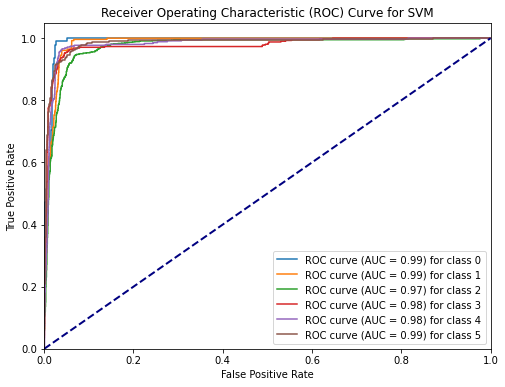

In [195]:
# Initialize and train SVM classifier
svm = SVC(random_state=42)
svm.fit(X_train_tfidf, y_train)

# Get predicted probabilities for each class
svm_y_pred_proba = svm.decision_function(X_test_tfidf)

# Initialize lists to store fpr, tpr, and auc for each class
fpr_svm = dict()
tpr_svm = dict()
roc_auc_svm = dict()

# Calculate fpr, tpr, and auc for each class
for i in range(len(data['Emotion_num'].unique())):
    fpr_svm[i], tpr_svm[i], _ = roc_curve((y_test == i).astype(int), svm_y_pred_proba[:, i])
    roc_auc_svm[i] = auc(fpr_svm[i], tpr_svm[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(data['Emotion_num'].unique())):
    plt.plot(fpr_svm[i], tpr_svm[i], label='ROC curve (AUC = %0.2f) for class %d' % (roc_auc_svm[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for SVM')
plt.legend(loc="lower right")
plt.show()


In [196]:
from sklearn.metrics import roc_auc_score

# Initialize an empty list to store AUC scores for each class
auc_scores = []

# Calculate AUC score for each class
for i in range(len(data['Emotion_num'].unique())):
    auc_score = roc_auc_score(y_test == i, svm_y_pred_proba[:, i])
    auc_scores.append(auc_score)

# Print the AUC scores
print("AUC Scores for Each Class:")
for i, auc_score in enumerate(auc_scores):
    print("Class {}: {:.4f}".format(i, auc_score))
# Calculate the average ROC curve score
avg_auc_score = np.mean(auc_scores)

# Print the average ROC curve score
print("Average ROC Curve Score:", avg_auc_score)

AUC Scores for Each Class:
Class 0: 0.9910
Class 1: 0.9853
Class 2: 0.9735
Class 3: 0.9768
Class 4: 0.9818
Class 5: 0.9858
Average ROC Curve Score: 0.9823838100967287


<Figure size 720x504 with 0 Axes>

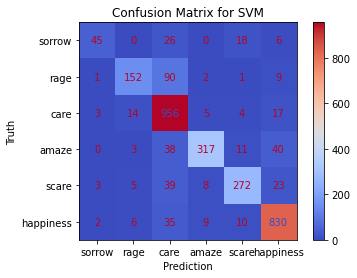

In [197]:
from sklearn.metrics import plot_confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plot_confusion_matrix(svm, X_test_tfidf, y_test, cmap='coolwarm', display_labels=data['Emotion'].unique())
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix for SVM')
plt.show()

## Logistic Regression

In [198]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for logistic regression
param_grid_log_reg = {
    'C': [0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)

# Initialize GridSearchCV for logistic regression
grid_search_log_reg = GridSearchCV(log_reg, param_grid_log_reg, cv=5, n_jobs=-1)

# Perform grid search for logistic regression
grid_search_log_reg.fit(X_train_tfidf, y_train)

# Get the best parameters for logistic regression
best_params_log_reg = grid_search_log_reg.best_params_
print("Best Parameters for Logistic Regression:", best_params_log_reg)

# Predict on the test set using the best logistic regression model
best_log_reg = grid_search_log_reg.best_estimator_
log_reg_y_pred = best_log_reg.predict(X_test_tfidf)


/Users/saisrikar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saisrikar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saisrikar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saisrikar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saisrikar/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/saisrikar/opt/anaconda3

Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}


In [199]:
print("Classification Report:\n", classification_report(y_test, log_reg_y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.67      0.74        95
           1       0.82      0.80      0.81       255
           2       0.92      0.94      0.93       999
           3       0.93      0.89      0.91       409
           4       0.84      0.90      0.87       350
           5       0.94      0.94      0.94       892

    accuracy                           0.91      3000
   macro avg       0.88      0.86      0.87      3000
weighted avg       0.91      0.91      0.91      3000



In [200]:
# Perform 5-fold cross-validation
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(log_reg, X_train_tfidf, y_train, cv=5)

In [201]:
# Print the score for each fold
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i} score: {score}")

# Calculate and print the average cross-validation score
average_cv_score = cv_scores.mean()
print(f"Average CV score: {average_cv_score}")

Fold 1 score: 0.8404166666666667
Fold 2 score: 0.8404166666666667
Fold 3 score: 0.8295833333333333
Fold 4 score: 0.8258333333333333
Fold 5 score: 0.8291666666666667
Average CV score: 0.8330833333333334


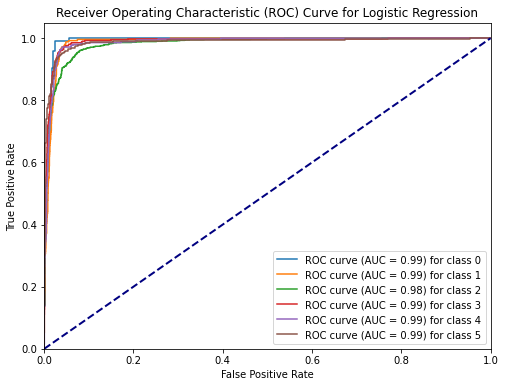

In [202]:
# Initialize and train Logistic Regression classifier
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_tfidf, y_train)

# Get predicted probabilities for each class
log_reg_y_pred_proba = log_reg.predict_proba(X_test_tfidf)

# Initialize lists to store fpr, tpr, and auc for each class
fpr_log_reg = dict()
tpr_log_reg = dict()
roc_auc_log_reg = dict()

# Calculate fpr, tpr, and auc for each class
for i in range(len(data['Emotion_num'].unique())):
    fpr_log_reg[i], tpr_log_reg[i], _ = roc_curve((y_test == i).astype(int), log_reg_y_pred_proba[:, i])
    roc_auc_log_reg[i] = auc(fpr_log_reg[i], tpr_log_reg[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(data['Emotion_num'].unique())):
    plt.plot(fpr_log_reg[i], tpr_log_reg[i], label='ROC curve (AUC = %0.2f) for class %d' % (roc_auc_log_reg[i], i))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression')
plt.legend(loc="lower right")
plt.show()


In [203]:
from sklearn.metrics import roc_auc_score

# Initialize an empty list to store AUC scores for each class
auc_scores = []

# Calculate AUC score for each class
for i in range(len(data['Emotion_num'].unique())):
    auc_score = roc_auc_score(y_test == i, log_reg_y_pred_proba[:, i])
    auc_scores.append(auc_score)

# Print the AUC scores
print("AUC Scores for Each Class:")
for i, auc_score in enumerate(auc_scores):
    print("Class {}: {:.4f}".format(i, auc_score))
# Calculate the average ROC curve score
avg_auc_score = np.mean(auc_scores)

# Print the average ROC curve score
print("Average ROC Curve Score:", avg_auc_score)

AUC Scores for Each Class:
Class 0: 0.9920
Class 1: 0.9873
Class 2: 0.9818
Class 3: 0.9894
Class 4: 0.9870
Class 5: 0.9874
Average ROC Curve Score: 0.9874760764164235


<Figure size 720x504 with 0 Axes>

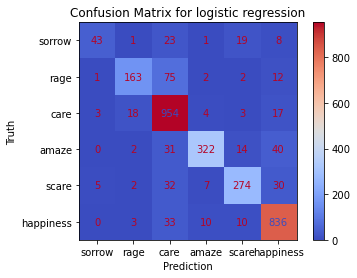

In [204]:
from sklearn.metrics import plot_confusion_matrix

# Plot confusion matrix
plt.figure(figsize=(10, 7))
plot_confusion_matrix(log_reg, X_test_tfidf, y_test, cmap='coolwarm', display_labels=data['Emotion'].unique())
plt.xlabel('Prediction')
plt.ylabel('Truth')
plt.title('Confusion Matrix for logistic regression')
plt.show()

# <center><div style="font-family: Trebuchet MS; background-color: #E94B3C; color: #2D2926; padding: 12px; line-height: 1;">Algorithm Results Table for Baseline model</div></center>

|Sr. No.|ML Algorithm|Cross Validation Score|ROC AUC Score|Accuracy|
|-|-|-|-|-|
|1|Random Forest|87.87%|98.98%|89%|
|2|SVM Classifier|81.5%|98%|86%|
|3|Logistic Regression|83.3%|98.74%|91%|

# Overall, Accuracy for the Intermediate model is 91% on train dataset

## External validation

In [38]:
testing_1 = pd.read_csv('test.csv')

In [39]:
testing_1.head()

,Text
0,i mean as a group thing it felt good to get in...
1,i feel drained mentally and physically and i r...
2,i often feel that they are not an extremely cl...
3,i am not wishing november away or trying to fo...
4,i feel stupid and thoughtless


In [40]:
# Define function for text preprocessing
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove special characters, punctuation, and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into a single string
    preprocessed_text = ' '.join(tokens)
    
    return preprocessed_text

# Apply preprocessing to the 'Text' column in the DataFrame
testing_1['Processed_Text'] = testing_1['Text'].apply(preprocess_text)

# Display the preprocessed text data
print(testing_1[['Text', 'Processed_Text']].head())

                                                Text  \
0  i mean as a group thing it felt good to get in...   
1  i feel drained mentally and physically and i r...   
2  i often feel that they are not an extremely cl...   
3  i am not wishing november away or trying to fo...   
4                      i feel stupid and thoughtless   

                                      Processed_Text  
0  mean group thing felt good get add something r...  
1  feel drained mentally physically really need g...  
2        often feel extremely clever talented people  
3  wishing november away trying forget thanksgivi...  
4                            feel stupid thoughtless  


In [41]:
testing_1.head()

,Text,Processed_Text
0,i mean as a group thing it felt good to get in...,mean group thing felt good get add something r...
1,i feel drained mentally and physically and i r...,feel drained mentally physically really need g...
2,i often feel that they are not an extremely cl...,often feel extremely clever talented people
3,i am not wishing november away or trying to fo...,wishing november away trying forget thanksgivi...
4,i feel stupid and thoughtless,feel stupid thoughtless


In [42]:
X_test_count = tfidf_vectorizer.transform(testing_1['Processed_Text']) 

In [43]:
X_test_count.shape

(1000, 13039)

In [44]:
pred = rfc.predict(X_test_count)

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [212]:
print(pred)

[2 5 2 4 5 2 2 5 4 3 5 2 4 5 5 4 2 5 2 5 3 2 2 3 5 3 3 5 5 4 2 2 2 5 5 4 3
 2 0 5 5 2 5 1 4 4 2 2 5 2 4 4 5 3 4 2 5 5 5 2 2 2 2 2 3 5 5 0 2 3 2 4 0 4
 5 3 1 5 5 2 5 5 2 4 2 2 5 5 5 2 1 2 3 3 2 1 0 5 5 3 2 4 2 5 2 5 5 2 3 0 5
 5 2 2 0 2 5 5 1 2 2 5 2 3 5 1 5 2 3 5 3 5 2 2 3 2 2 2 4 5 5 5 2 2 2 2 2 2
 3 1 2 1 4 2 2 2 3 2 4 5 2 5 2 5 2 2 2 2 2 4 2 5 5 5 2 5 5 2 1 4 2 5 2 2 2
 2 2 3 5 3 5 5 2 3 1 0 2 1 3 4 3 5 1 4 2 5 1 4 2 5 2 5 2 2 3 4 1 2 5 5 4 3
 2 5 2 2 5 1 2 2 5 2 1 4 2 2 5 5 3 2 5 2 2 5 5 2 2 5 2 5 5 1 1 2 2 4 5 2 3
 2 4 2 2 4 1 3 2 3 1 5 5 2 5 5 2 5 5 4 4 5 2 2 2 5 5 0 4 3 5 2 1 2 2 5 2 2
 2 2 5 5 2 2 4 4 4 2 3 1 2 2 2 5 2 5 3 4 4 2 4 2 3 5 3 4 5 3 4 2 2 3 5 1 5
 5 2 1 1 4 4 5 2 1 2 2 5 0 5 5 2 2 2 2 4 2 2 0 1 3 5 1 2 2 1 4 3 4 5 5 2 2
 2 1 0 3 4 3 1 2 2 3 3 5 1 0 2 5 1 2 5 1 2 2 2 1 5 2 5 2 3 2 3 2 5 5 4 2 2
 1 4 2 3 1 3 3 2 2 0 5 2 0 4 0 2 3 2 2 2 3 5 3 2 3 2 3 4 2 2 4 4 2 2 4 5 5
 4 4 2 3 1 3 4 5 2 2 5 4 0 2 2 3 2 5 5 4 5 2 5 3 3 5 0 2 1 2 2 5 5 2 2 2 5
 3 5 4 4 2 5 5 4 4 2 5 4 

In [213]:
manual_mapping = {0: "amaze", 1: "care", 2: "happiness", 3: "rage", 4: "scare", 5: "sorrow"}
# Convert numerical predictions to room types using manual mapping
pred_labels_mapped = [manual_mapping[label] for label in pred]

In [214]:
print(pred_labels_mapped)

['happiness', 'sorrow', 'happiness', 'scare', 'sorrow', 'happiness', 'happiness', 'sorrow', 'scare', 'rage', 'sorrow', 'happiness', 'scare', 'sorrow', 'sorrow', 'scare', 'happiness', 'sorrow', 'happiness', 'sorrow', 'rage', 'happiness', 'happiness', 'rage', 'sorrow', 'rage', 'rage', 'sorrow', 'sorrow', 'scare', 'happiness', 'happiness', 'happiness', 'sorrow', 'sorrow', 'scare', 'rage', 'happiness', 'amaze', 'sorrow', 'sorrow', 'happiness', 'sorrow', 'care', 'scare', 'scare', 'happiness', 'happiness', 'sorrow', 'happiness', 'scare', 'scare', 'sorrow', 'rage', 'scare', 'happiness', 'sorrow', 'sorrow', 'sorrow', 'happiness', 'happiness', 'happiness', 'happiness', 'happiness', 'rage', 'sorrow', 'sorrow', 'amaze', 'happiness', 'rage', 'happiness', 'scare', 'amaze', 'scare', 'sorrow', 'rage', 'care', 'sorrow', 'sorrow', 'happiness', 'sorrow', 'sorrow', 'happiness', 'scare', 'happiness', 'happiness', 'sorrow', 'sorrow', 'sorrow', 'happiness', 'care', 'happiness', 'rage', 'rage', 'happiness', 

In [215]:
# Step 5: Save the predictions as a CSV file
submission = pd.DataFrame({'Emotion': pred_labels_mapped})

In [216]:
submission.to_csv("Intermediatesubmission.csv", index=False)

In [217]:
y_test = pd.read_csv('solution.csv')

In [218]:
from sklearn.metrics import balanced_accuracy_score

def model_evaluation(y_test, y_pred):
    # Calculate the balanced accuracy score
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)

    # Return the balanced accuracy as a single digit number
    print('The Balanced accuracy is : ', balanced_accuracy)

In [219]:
test_score = model_evaluation(y_test,pred_labels_mapped)

The Balanced accuracy is :  0.8510647369407343


## Balanced accuracy score for intermediate model on test dataset(hidden label) is found to be 85%

## Overall

## Baseline accuracy on test dataset is 80%

## Intermediate accuracy on test dataset is 85%
